# SiGesGuarda Database

In this notebook, I create different subsets of the criminalBehaviour database

To do a temporal prediction:

- db_criminalBehaviour_byYear.csv : group by year and create a 'count' feature indicating how many times the problem happened in each year

- db_criminalBehaviour_byMonth.csv : group by year and month, and create a 'count' feature indicating how many times the problem happened in each month of each year

- db_criminalBehaviour_byWeekDay.csv : group by year, month, and week day, and create a 'count' feature indicating how many times the problem happened in each week day of each month of each year

To do a clustering by neighbourhood:

- db_criminalBehaviour_byNeighbourhood.csv : group by year, month, week day, and neighbourhood, and create a 'count' feature indicating how many times the problem happened for each combination of these features

Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Definition of global parameters for the pyplot

In [2]:
SMALL_SIZE = 8 # points
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.rcParams['figure.facecolor']   = 'white'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.facecolor']     = 'white'
plt.rcParams['axes.spines.right']  = False
plt.rcParams['axes.spines.top']    = False
plt.rcParams['font.family']        = 'sans-serif'
plt.rcParams['font.sans-serif']    = ['Arial', 'DejaVu']
plt.rcParams['savefig.dpi']        = 300
plt.rcParams['svg.fonttype']       = 'none'
plt.rcParams['pdf.fonttype']       = 42
plt.rcParams['ps.fonttype']        = 42

cm = 1/2.54  # centimeters in inches
single_col = 8.9*cm
oneDot5_col = 12.7*cm
two_col = 18.2*cm

In this notebook, we read the database of criminal behaviour and create other sub-datasets, which will be used as input for the ML:

- data by year
- data by year and month
- data by year, month, and week day
- data by year, month, week day and neighbourhood

In [3]:
df = pd.read_csv('./db_criminalBehaviour.csv', sep="\t")


C:\Users\vanes\AppData\Local\Temp\ipykernel_26396\2464336824.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./db_criminalBehaviour.csv', sep="\t")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90086 entries, 0 to 90085
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               90086 non-null  int64  
 1   neighbourhood            90046 non-null  object 
 2   urban_facility           44012 non-null  object 
 3   flag_urban_facility      90086 non-null  object 
 4   flag_flagrant            90086 non-null  object 
 5   street_name              90051 non-null  object 
 6   flag_civil_protection_1  90086 non-null  int64  
 7   problem_type_1           90086 non-null  object 
 8   flag_civil_protection_2  5717 non-null   float64
 9   problem_type_2           5717 non-null   object 
 10  flag_civil_protection_3  465 non-null    float64
 11  problem_type_3           465 non-null    object 
 12  flag_civil_protection_4  77 non-null     float64
 13  problem_type_4           77 non-null     object 
 14  flag_civil_protection_

In [5]:
groups = ['year','categories','problem_type_1']
df_byYear = df.groupby(groups).count()
df_byYear.reset_index(inplace=True)
df_byYear.sort_values(by=["year"], ascending=True)
df_byYear.head(10)

,year,categories,problem_type_1,Unnamed: 0,neighbourhood,urban_facility,flag_urban_facility,flag_flagrant,street_name,flag_civil_protection_1,...,month,operation_name,call_origin,regional_name,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day
0,2009,CriminalBehaviour,Abandonment/nonsupport of incompetent person,14,14,10,14,14,14,14,...,14,0,14,14,14,14,14,0,0,14
1,2009,CriminalBehaviour,Abuse of incapacitated persons,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,0,0,2
2,2009,CriminalBehaviour,Agression,297,297,228,297,297,297,297,...,297,0,297,297,297,297,297,0,0,297
3,2009,CriminalBehaviour,Break-in,925,924,594,925,925,925,925,...,925,0,925,925,925,925,925,0,52,925
4,2009,CriminalBehaviour,Child grooming/enticement,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,0,0,2
5,2009,CriminalBehaviour,Corporal injury,25,25,19,25,25,25,25,...,25,0,25,25,25,25,25,0,0,25
6,2009,CriminalBehaviour,Crime against individual liberty,3,3,2,3,3,3,3,...,3,0,3,3,3,3,3,0,0,3
7,2009,CriminalBehaviour,Crime apology,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,0,0,1
8,2009,CriminalBehaviour,Embezzlement,3,3,0,3,3,3,3,...,3,0,3,3,3,3,3,0,0,3
9,2009,CriminalBehaviour,Environmental crime,16,16,5,16,16,16,16,...,16,0,16,16,16,16,16,0,0,16


In [6]:
columns2keep = groups + ['count']
columns2drop = set(df_byYear.columns) - set(columns2keep)
df_byYear['count'] = df_byYear['neighbourhood']
df_byYear.reset_index(inplace=True)
df_byYear.drop(columns2drop, axis=1, inplace=True)
df_byYear.head()

,index,year,categories,problem_type_1,count
0,0,2009,CriminalBehaviour,Abandonment/nonsupport of incompetent person,14
1,1,2009,CriminalBehaviour,Abuse of incapacitated persons,2
2,2,2009,CriminalBehaviour,Agression,297
3,3,2009,CriminalBehaviour,Break-in,924
4,4,2009,CriminalBehaviour,Child grooming/enticement,2


In [7]:
groups = ['year','month','categories','problem_type_1']
df_byMonth = df.groupby(groups).count()
df_byMonth.reset_index(inplace=True)
df_byMonth.sort_values(by=["year",'month'], ascending=True)
df_byMonth.head(3)

,year,month,categories,problem_type_1,Unnamed: 0,neighbourhood,urban_facility,flag_urban_facility,flag_flagrant,street_name,...,time,operation_name,call_origin,regional_name,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day
0,2009,1,CriminalBehaviour,Abandonment/nonsupport of incompetent person,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,0,1
1,2009,1,CriminalBehaviour,Agression,27,27,16,27,27,27,...,27,0,27,27,27,27,27,0,0,27
2,2009,1,CriminalBehaviour,Break-in,94,94,44,94,94,94,...,94,0,94,94,94,94,94,0,12,94


In [8]:
columns2keep = groups + ['count']
columns2drop = set(df_byMonth.columns) - set(columns2keep)
df_byMonth['count'] = df_byMonth['neighbourhood']
df_byMonth.reset_index(inplace=True)
df_byMonth.drop(columns2drop, axis=1, inplace=True)
df_byMonth.head()

,index,year,month,categories,problem_type_1,count
0,0,2009,1,CriminalBehaviour,Abandonment/nonsupport of incompetent person,1
1,1,2009,1,CriminalBehaviour,Agression,27
2,2,2009,1,CriminalBehaviour,Break-in,94
3,3,2009,1,CriminalBehaviour,Corporal injury,2
4,4,2009,1,CriminalBehaviour,Crime apology,1


In [9]:
groups = ['year','month','week_day','categories','problem_type_1']#, ,'neighbourhood']
df_byWeekDay = df.groupby(groups).count()
df_byWeekDay.reset_index(inplace=True)
df_byWeekDay.sort_values(by=["year",'month','week_day'], ascending=True)
df_byWeekDay.head(3)

,year,month,week_day,categories,problem_type_1,Unnamed: 0,neighbourhood,urban_facility,flag_urban_facility,flag_flagrant,...,time,operation_name,call_origin,regional_name,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day
0,2009,1,1-Sunday,CriminalBehaviour,Agression,6,6,5,6,6,...,6,0,6,6,6,6,6,0,0,6
1,2009,1,1-Sunday,CriminalBehaviour,Break-in,19,19,11,19,19,...,19,0,19,19,19,19,19,0,2,19
2,2009,1,1-Sunday,CriminalBehaviour,Environmental crime,2,2,1,2,2,...,2,0,2,2,2,2,2,0,0,2


In [10]:
columns2keep = groups + ['count']
columns2drop = set(df_byWeekDay.columns) - set(columns2keep)
df_byWeekDay['count'] = df_byWeekDay['neighbourhood']
df_byWeekDay.reset_index(inplace=True)
df_byWeekDay.drop(columns2drop, axis=1, inplace=True)
df_byWeekDay.head()

,index,year,month,week_day,categories,problem_type_1,count
0,0,2009,1,1-Sunday,CriminalBehaviour,Agression,6
1,1,2009,1,1-Sunday,CriminalBehaviour,Break-in,19
2,2,2009,1,1-Sunday,CriminalBehaviour,Environmental crime,2
3,3,2009,1,1-Sunday,CriminalBehaviour,Gunshot,1
4,4,2009,1,1-Sunday,CriminalBehaviour,Illegal possession,1


In [14]:
groups = ['year','month','week_day','neighbourhood','categories','problem_type_1']
df_byYearNeighbourhood = df.groupby(groups).count()
df_byYearNeighbourhood.reset_index(inplace=True)
df_byYearNeighbourhood.sort_values(by=["year"], ascending=True)
df_byYearNeighbourhood.head(3)

,year,month,week_day,neighbourhood,categories,problem_type_1,Unnamed: 0,urban_facility,flag_urban_facility,flag_flagrant,...,time,operation_name,call_origin,regional_name,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day
0,2009,1,1-Sunday,ABRANCHES,CriminalBehaviour,Break-in,1,1,1,1,...,1,0,1,1,1,1,1,0,0,1
1,2009,1,1-Sunday,AUGUSTA,CriminalBehaviour,Theft,1,1,1,1,...,1,0,1,1,1,1,1,0,0,1
2,2009,1,1-Sunday,ÁGUA VERDE,CriminalBehaviour,Illitcit Substance,1,0,1,1,...,1,0,1,1,1,1,1,0,0,1


In [15]:
columns2keep = groups + ['count']
columns2drop = set(df_byYearNeighbourhood.columns) - set(columns2keep)
df_byYearNeighbourhood['count'] = df_byYearNeighbourhood['day']
df_byYearNeighbourhood.reset_index(inplace=True)
df_byYearNeighbourhood.drop(columns2drop, axis=1, inplace=True)
df_byYearNeighbourhood.head()

,index,year,month,week_day,neighbourhood,categories,problem_type_1,count
0,0,2009,1,1-Sunday,ABRANCHES,CriminalBehaviour,Break-in,1
1,1,2009,1,1-Sunday,AUGUSTA,CriminalBehaviour,Theft,1
2,2,2009,1,1-Sunday,ÁGUA VERDE,CriminalBehaviour,Illitcit Substance,1
3,3,2009,1,1-Sunday,ÁGUA VERDE,CriminalBehaviour,Theft,1
4,4,2009,1,1-Sunday,BACACHERI,CriminalBehaviour,Obscene/libelous acts,1


In [ ]:
df_byYear.to_csv('db_criminalBehaviour_byYear.csv')
df_byMonth.to_csv('db_criminalBehaviour_byMonth.csv')
df_byWeekDay.to_csv('db_criminalBehaviour_byWeekDay.csv')
df_byYearNeighbourhood.to_csv('db_criminalBehaviour_byNeighbourhood.csv')

In [17]:
df_byYear[(df_byYear['year']==2010)&(df_byYear['problem_type_1']=='Agression')]

,index,year,categories,problem_type_1,count
43,43,2010,CriminalBehaviour,Agression,294


<Axes: xlabel='year', ylabel='count'>

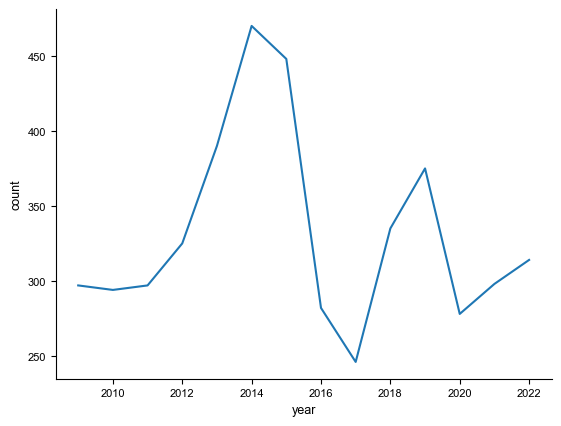

In [18]:
sns.lineplot(data=df_byYear[df_byYear['problem_type_1']=='Agression'], x='year', y='count')

<Axes: xlabel='month', ylabel='count'>

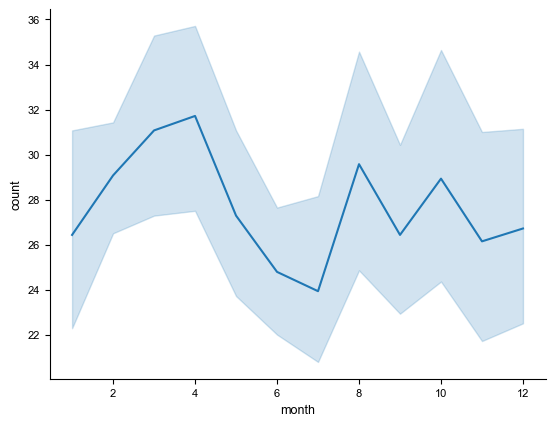

In [20]:
sns.lineplot(data=df_byMonth[df_byMonth['problem_type_1']=='Agression'], x='month', y='count')

<Axes: xlabel='month', ylabel='count'>

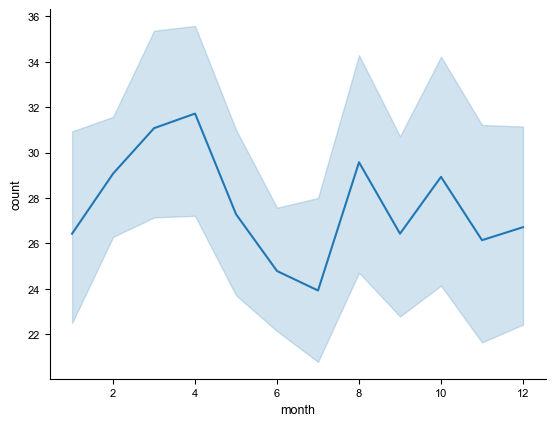

In [34]:
sns.lineplot(data=df_byMonth[df_byMonth['problem_type_1']=='Agression'], x='month', y='count')

<Axes: xlabel='week_day', ylabel='count'>

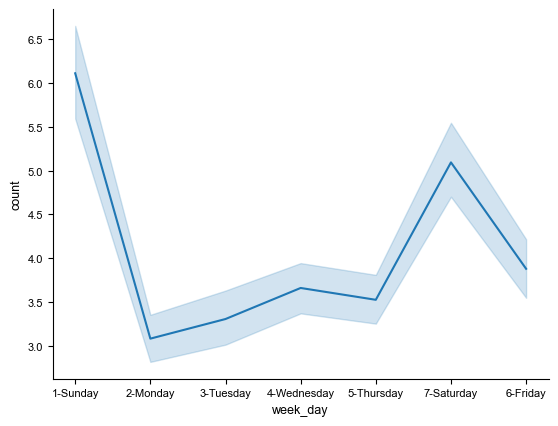

In [35]:
sns.lineplot(data=df_byWeekDay[df_byWeekDay['problem_type_1']=='Agression'], x='week_day', y='count')

In [45]:
sns.heatmap(data=df_byYearNeighbourhood[df_byYearNeighbourhood['problem_type_1']=='Agression'])

ValueError: could not convert string to float: 'ALTO BOQUEIRÃO'